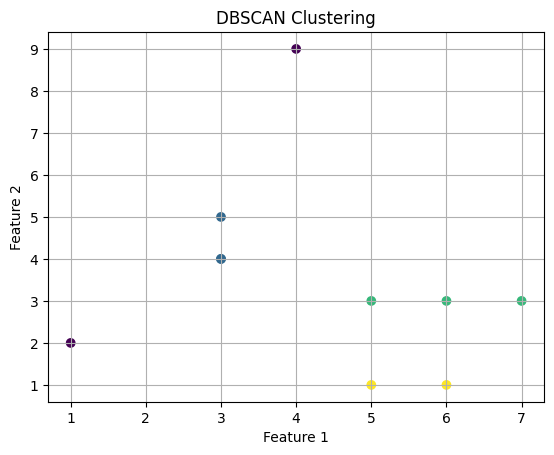

In [1]:
#Density Based Clustering (DBSCAN)
from sklearn.cluster import DBSCAN
import numpy as np                                        
import matplotlib.pyplot as plt                           
X = np.array([
    [1,2],
    [3,4],
    [5,3],
    [3,5],
    [7,3],
    [6,1],
    [5,1],
    [4,9],
    [3,4],
    [6,3]
])
dbscan=DBSCAN(eps=1.5,min_samples=2)
db_labels=dbscan.fit_predict(X)
plt.scatter(X[:,0],X[:,1],c=db_labels)
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("DBSCAN Clustering")
plt.grid(True)
plt.show()

Cluster Labels:
[-1  0  1  0  1  2  2 -1  0  1]


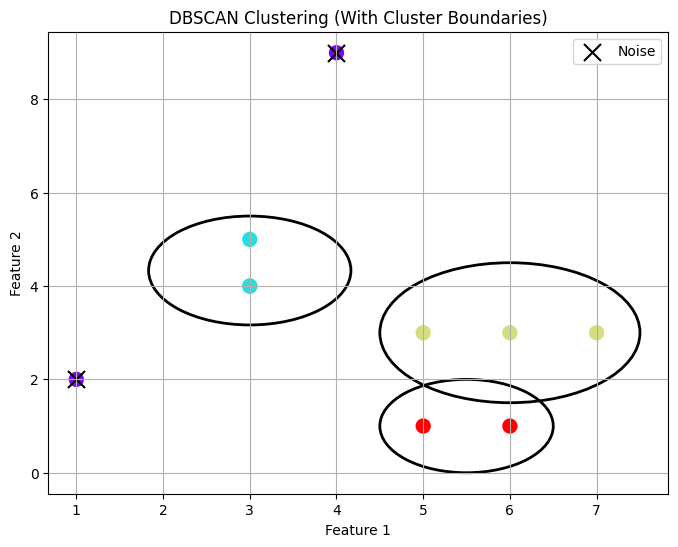

In [2]:
# Density Based Clustering (DBSCAN) - v2

from sklearn.cluster import DBSCAN
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Circle

# ----------------------------------------
# Step 1: Create Dataset
# ----------------------------------------
# 10 data points with 2 features
X = np.array([
    [1,2],
    [3,4],
    [5,3],
    [3,5],
    [7,3],
    [6,1],
    [5,1],
    [4,9],
    [3,4],
    [6,3]
])

# ----------------------------------------
# Step 2: Create DBSCAN Model
# ----------------------------------------
# eps = maximum distance between neighbors
# min_samples = minimum points required to form a dense region
dbscan = DBSCAN(eps=1.5, min_samples=2)

# ----------------------------------------
# Step 3: Fit model and predict cluster labels
# ----------------------------------------
db_labels = dbscan.fit_predict(X)

# ----------------------------------------
# Step 4: Print cluster labels
# ----------------------------------------
print("Cluster Labels:")
print(db_labels)

# Note:
# -1 → Noise (outlier)
#  0,1,2,... → Cluster numbers

# ----------------------------------------
# Step 5: Plot clusters
# ----------------------------------------
plt.figure(figsize=(8,6))

# Scatter plot colored by cluster labels
scatter = plt.scatter(X[:,0], X[:,1], c=db_labels, cmap='rainbow', s=100)

# ----------------------------------------
# Step 6: Circle each cluster
# ----------------------------------------
unique_labels = set(db_labels)

for label in unique_labels:
    
    # Ignore noise points (-1)
    if label == -1:
        continue
    
    # Get points belonging to this cluster
    cluster_points = X[db_labels == label]
    
    # Compute cluster center (mean of cluster points)
    center = cluster_points.mean(axis=0)
    
    # Compute radius (max distance from center)
    radius = np.max(np.linalg.norm(cluster_points - center, axis=1))
    
    # Draw circle around cluster
    circle = Circle(center, radius + 0.5, 
                    fill=False, edgecolor='black', linewidth=2)
    plt.gca().add_patch(circle)

# ----------------------------------------
# Step 7: Highlight noise points
# ----------------------------------------
noise = X[db_labels == -1]
if len(noise) > 0:
    plt.scatter(noise[:,0], noise[:,1], 
                color='black', marker='x', s=150, label='Noise')

plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("DBSCAN Clustering (With Cluster Boundaries)")
plt.grid(True)
plt.legend()
plt.show()
